In [2]:
#================================================================
# Importación de librerias
#----------------------------------------------------------------
# Pandas = Manejo de datos y estructuras de Dataframe
# Numpy  = Operaciones numericas y calculos auxiliares
# Matplotlib = Visualizacion grafica
#================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#================================================================
# DEFINIMOS LA RUTA QUE CONTIENE NUESTRA INFORMACION Y CREAMOS NUESTRO DATAFRAME
#----------------------------------------------------------------
# Se lee el archivo CSV que contiene la información de ventas y
# todos los canales, productos, clientes etc.
# df.head(), nos muestra las primeras filas para realizar la validacion 
# de que el archivo se cargo correctamente.
#================================================================

ruta = '/Users/edvinvargas/Desktop/Programacion/Data Science/Proyecto_Basico/ventasHoreca.csv'
df = pd.read_csv(ruta)
df.head()

,fecha,sku,producto,categoria,cliente,canal,zona,precio_unitario,cantidad,costo_unitario,margen_unitario,total_venta,total_costo,total_margen
0,2023-06-20,SKU-A002,Hash brown 1kg,Papas & Appetizers,Taquería Don Memo,Mayorista,Izabal,23.48,4,17.40,6.08,93.92,69.60,24.32
1,2023-09-09,SKU-PR002,Salchicha tipo viena 1kg,Procesados,Comedor La Terminal,HORECA,Petén,28.50,6,17.89,10.61,171.00,107.34,63.66
2,2024-11-11,SKU-D003,Contenedor plástico con tapa,Descartables / Empaques,Tienda Doña Juanita,HORECA,El Progreso,30.01,10,21.75,8.26,300.10,217.50,82.60
3,2023-02-07,SKU-PA002,Toalla de cocina 2 rollos,Papel,Supermercado El Sol,Mayorista,Retalhuleu,22.79,10,15.58,7.21,227.90,155.80,72.10
4,2023-08-16,SKU-A003,Aros de cebolla 1kg,Papas & Appetizers,Distribuidora El Centro,Retail,Jalapa,24.77,9,16.78,7.99,222.93,151.02,71.91


In [ ]:
#================================================================
#VERIFICAMOS LA INFORMACION DEL DF
#----------------------------------------------------------------
# df.info() nos permite entender: 
# - Cantidad de filas y columnas
# - Tipos de datos (objetos, float, int, datetime, valores nulos)
# Esto es escencial para planificas el proceso ETL:
# para detectar columnas que necesitan conversion, faltantes y 
# validar si el dataset esta bien estructurado.
#================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fecha            50000 non-null  object 
 1   sku              50000 non-null  object 
 2   producto         50000 non-null  object 
 3   categoria        50000 non-null  object 
 4   cliente          50000 non-null  object 
 5   canal            50000 non-null  object 
 6   zona             50000 non-null  object 
 7   precio_unitario  50000 non-null  float64
 8   cantidad         50000 non-null  int64  
 9   costo_unitario   50000 non-null  float64
 10  margen_unitario  50000 non-null  float64
 11  total_venta      50000 non-null  float64
 12  total_costo      50000 non-null  float64
 13  total_margen     50000 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 5.3+ MB


In [ ]:
#========================================================
#Conversion de columna fecha(Objeto) a datetime
#--------------------------------------------------------
# pd.to_datetime convierte la columna a formato datetime
# para poder realizar las manipulaciones de la columna fecha.
#========================================================

df['fecha'] = pd.to_datetime(df['fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            50000 non-null  datetime64[ns]
 1   sku              50000 non-null  object        
 2   producto         50000 non-null  object        
 3   categoria        50000 non-null  object        
 4   cliente          50000 non-null  object        
 5   canal            50000 non-null  object        
 6   zona             50000 non-null  object        
 7   precio_unitario  50000 non-null  float64       
 8   cantidad         50000 non-null  int64         
 9   costo_unitario   50000 non-null  float64       
 10  margen_unitario  50000 non-null  float64       
 11  total_venta      50000 non-null  float64       
 12  total_costo      50000 non-null  float64       
 13  total_margen     50000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int6

In [ ]:
#============================================================
#Manipulacion de columna fecha(previamente convertido)
#------------------------------------------------------------
# Se crearon nuevas columnas apartir de la columna fecha
# columna Year, Month, year_month, son uno de las nuevas columnas
#============================================================

df['year'] = df['fecha'].dt.year
df['month'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.day_name()
df['year_month'] = df['fecha'].dt.to_period('M').astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            50000 non-null  datetime64[ns]
 1   sku              50000 non-null  object        
 2   producto         50000 non-null  object        
 3   categoria        50000 non-null  object        
 4   cliente          50000 non-null  object        
 5   canal            50000 non-null  object        
 6   zona             50000 non-null  object        
 7   precio_unitario  50000 non-null  float64       
 8   cantidad         50000 non-null  int64         
 9   costo_unitario   50000 non-null  float64       
 10  margen_unitario  50000 non-null  float64       
 11  total_venta      50000 non-null  float64       
 12  total_costo      50000 non-null  float64       
 13  total_margen     50000 non-null  float64       
 14  year             50000 non-null  int32

In [ ]:
# ================================================================
# Análisis temporal: Ventas por mes
# ---------------------------------------------------------------
# Se agrupa la información por año-mes para:
# - identificar tendencias de crecimiento o caída
# - detectar estacionalidad
# - observar picos y valles en la demanda
#
# Este análisis es fundamental en cualquier operación de distribución,
# ya que guía decisiones como:
# - planificación de inventario
# - programación de compras
# - ajuste de fuerza de ventas
# ================================================================


ventas_yearmonth = (
        df.groupby('year_month')['total_venta']
        .sum()
        .reset_index()
)
ventas_yearmonth.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year_month   24 non-null     object 
 1   total_venta  24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 516.0+ bytes


In [ ]:
ventas_yearmonth.head()

,year_month,total_venta
0,2023-01,741803.29
1,2023-02,635606.75
2,2023-03,735735.44
3,2023-04,733447.71
4,2023-05,745980.27


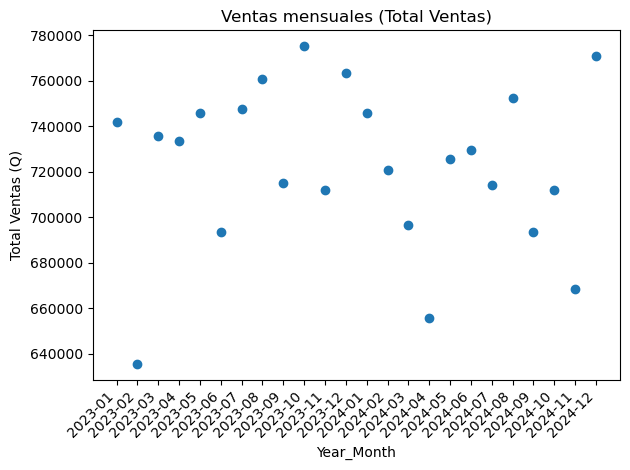

In [ ]:
# ---------------------------------------------------------------
# Visualización de ventas mensuales
# ---------------------------------------------------------------
# Esta gráfica permite:
#   - Observar la tendencia general del negocio.
#   - Detectar picos anormales o caídas inesperadas.
#   - Facilitar comparaciones entre meses consecutivos.
# ---------------------------------------------------------------


plt.figure()
plt.scatter(ventas_yearmonth['year_month'],
        ventas_yearmonth['total_venta'],
        marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Ventas mensuales (Total Ventas)')
plt.xlabel('Year_Month')
plt.ylabel('Total Ventas (Q)')
plt.tight_layout()
plt.show()

In [ ]:
# ================================================================
# ANÁLISIS POR CATEGORÍA DE PRODUCTO
# ---------------------------------------------------------------
# Objetivo:
#   Determinar qué tipos de productos generan mayor valor.
#
# Importancia del análisis:
#   - Identifica líneas de negocio estratégicas.
#   - Ayuda a priorizar esfuerzos comerciales.
#   - Muestra qué categorías impulsan la rentabilidad.
# ================================================================

ventas_categorias = (
    df.groupby('categoria')['total_venta']
    .sum()
    .reset_index()
    .sort_values('total_venta', ascending=False)
)
ventas_categorias

,categoria,total_venta
2,Grasas y Aceites,5139925.86
6,Proteínas,3812217.11
5,Procesados,2615727.83
3,Papas & Appetizers,2068449.79
0,Bebidas,1480238.29
1,Descartables / Empaques,1135578.59
4,Papel,1094712.81


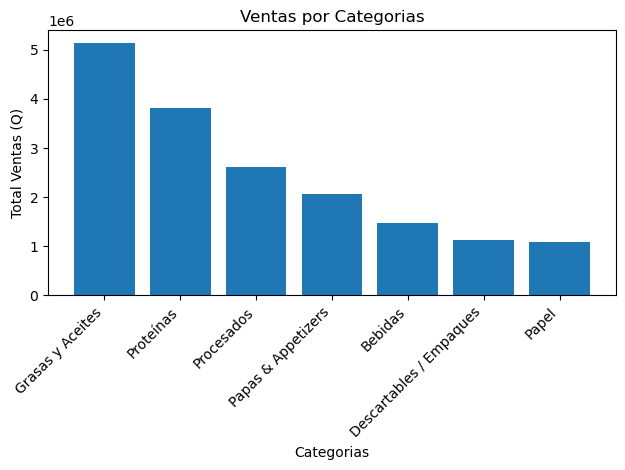

In [ ]:
# ---------------------------------------------------------------
# Visualización de ventas por categoría
# ---------------------------------------------------------------
# Permite comparar rápidamente el desempeño entre categorías.
# Ideal para decisiones de:
#   - ampliación de inventario
#   - promociones por familia de productos
#   - eliminación de líneas poco rentables
# ---------------------------------------------------------------

plt.figure()
plt.bar(ventas_categorias['categoria'],
       ventas_categorias['total_venta'])
plt.xticks(rotation=45, ha='right')
plt.title('Ventas por Categorias')
plt.xlabel('Categorias')
plt.ylabel('Total Ventas (Q)')
plt.tight_layout()
plt.show()

In [ ]:
# ================================================================
# ANÁLISIS POR CANAL (HORECA, Retail, Mayorista)
# ---------------------------------------------------------------
# Objetivo:
#   Evaluar qué tipo de cliente aporta más al negocio.
#
# Uso en la práctica:
#   - Asignación de fuerza de ventas.
#   - Ajuste de políticas de precios.
#   - Definir esfuerzos de marketing por canal.
# ================================================================


ventas_canal = (
    df.groupby('canal') ['total_venta']
    .sum()
    .reset_index()
    .sort_values('total_venta',ascending=False)
)
ventas_canal

,canal,total_venta
0,HORECA,7798301.97
2,Retail,6112751.00
1,Mayorista,3435797.31


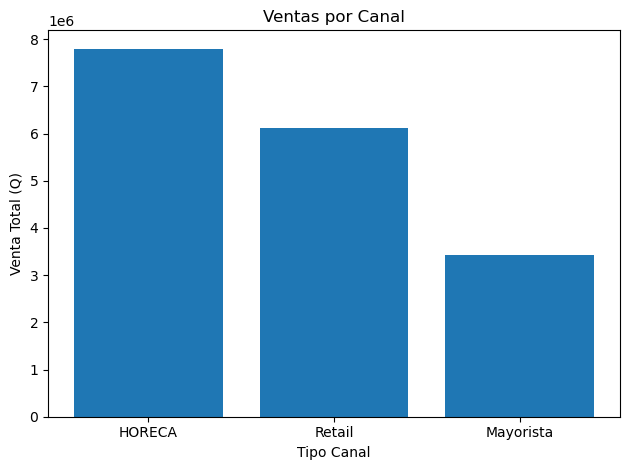

In [ ]:
# ================================================================
# VISUALIZACION TENDENCIA POR CANAL
# ---------------------------------------------------------------
# Objetivo:
#   Permite evaluar que canal tiene la mayor participacion en ventas
#
# Uso en la práctica:
#   - Definir esfuerzos de marketing por canal.
# ================================================================

ventas_canal

plt.figure()
plt.bar(ventas_canal['canal'],
       ventas_canal['total_venta'])
plt.title('Ventas por Canal')
plt.xlabel('Tipo Canal')
plt.ylabel('Venta Total (Q)')
plt.tight_layout()
plt.show()

In [ ]:
# ================================================================
# ANÁLISIS GEOGRÁFICO: VENTAS POR ZONA
# ---------------------------------------------------------------
# Objetivo:
#   Identificar regiones fuertes y débiles.
#
# Aporta valor en:
#   - Expansión territorial.
#   - Planeación de rutas y logística.
#   - Identificación de oportunidades comerciales.
# ================================================================

venta_zona = (
    df.groupby('zona')['total_venta']
    .sum()
    .reset_index()
    .sort_values('total_venta', ascending=False)
)
venta_zona

,zona,total_venta
4,Huehuetenango,1270461.72
5,Izabal,1266595.77
7,Jutiapa,1262547.56
0,Alta Verapaz,1254305.37
12,Santa Rosa,1251133.25
3,El Progreso,1247759.63
8,Petén,1247385.28
13,Zacapa,1229187.28
6,Jalapa,1228180.21
2,Chiquimula,1226156.36


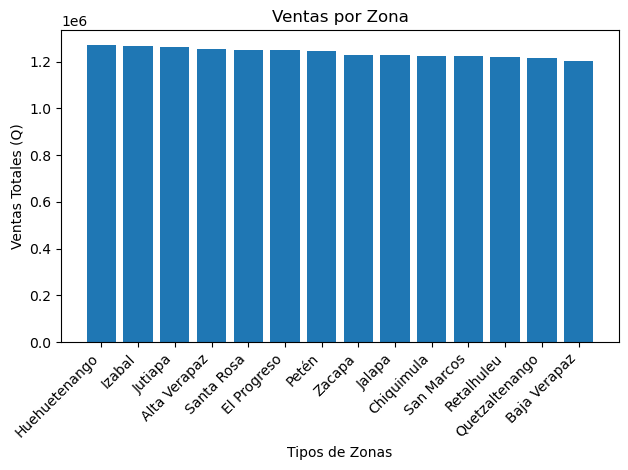

In [ ]:
plt.figure()
plt.bar(venta_zona['zona'],
       venta_zona['total_venta'])
plt.xticks(rotation=45,ha='right')
plt.title('Ventas por Zona')
plt.xlabel('Tipos de Zonas')
plt.ylabel('Ventas Totales (Q)')
plt.tight_layout()
plt.show()

In [ ]:
# ================================================================
# TOP 10 PRODUCTOS POR VENTAS
# ---------------------------------------------------------------
# Objetivo:
#   Identificar los productos que generan mayor volumen de ingresos.
#
# Uso real:
#   - Optimizar inventario de productos clave.
#   - Priorizar negociaciones con proveedores.
#   - Identificar productos estrella vs. productos de baja rotación.
# ================================================================

top_producto= (
    df.groupby('producto')['total_venta']
    .sum()
    .reset_index()
    .sort_values('total_venta', ascending=False)
    .head(10)
)
top_producto

,producto,total_venta
1,Aceite vegetal 20L,3783110.03
9,Filete de pescado 1kg,944789.67
21,Pechuga de pollo congelada 2kg,860123.77
13,Jamón de pavo 1kg,832994.08
6,Carne de res molida 1kg,812906.17
16,Manteca vegetal 5lb,789314.70
15,Lomo de cerdo 1kg,722427.93
19,Papas a la francesa 2.5kg,665713.66
7,Chorizo parrillero 1kg,621672.86
11,Hamburguesa congelada 1kg,610465.42


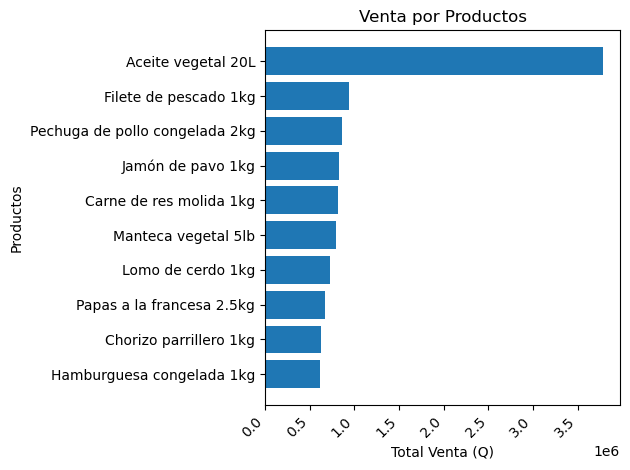

In [ ]:
plt.figure()
plt.barh(top_producto['producto'],
       top_producto['total_venta'])
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.title('Venta por Productos')
plt.xlabel('Total Venta (Q)')
plt.ylabel('Productos')
plt.tight_layout()
plt.show()

In [ ]:
# ================================================================
# TOP 10 CLIENTES POR VENTAS
# ---------------------------------------------------------------
# Objetivo:
#   Identificar clientes clave y su peso dentro del negocio.
#
# Importancia:
#   - Ayuda a detectar concentración excesiva de ingresos.
#   - Permite planificar estrategias de fidelización.
#   - Útil para análisis ABC de clientes.
# ================================================================

top_cliente=(
    df.groupby('cliente')['total_venta']
    .sum()
    .reset_index()
    .sort_values('total_venta', ascending=False)
    .head(10)
)
top_cliente

,cliente,total_venta
10,Hotel Camino Real,735601.17
15,Restaurante El Fogón,725622.54
2,Cafetería Aroma,723611.99
20,Taquería Don Memo,722122.02
24,Tienda La Esperanza,719992.66
13,Mini Market El Trébol,715392.20
1,Bodega San Juan,706894.18
18,Supermercado El Sol,706823.98
7,Distribuidora El Centro,705823.08
17,Restaurante Las Brasas,703862.54


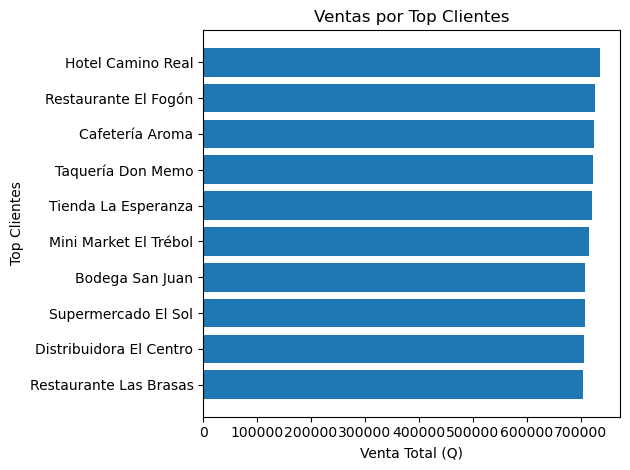

In [ ]:
plt.figure()
plt.barh(top_cliente['cliente'],
        top_cliente['total_venta'])
plt.gca().invert_yaxis()
plt.title('Ventas por Top Clientes')
plt.xlabel('Venta Total (Q)')
plt.ylabel('Top Clientes')
plt.tight_layout()
plt.show()

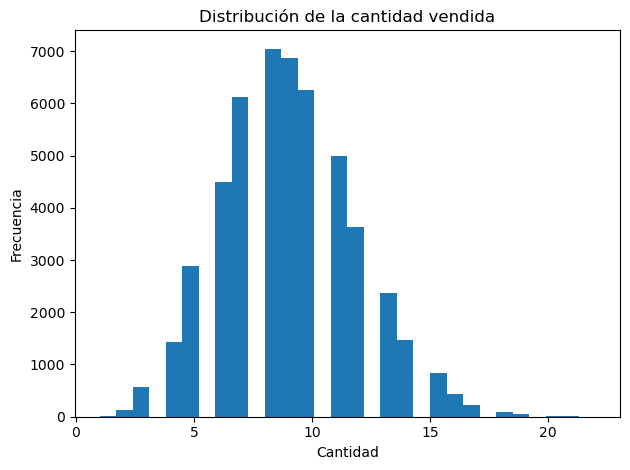

In [ ]:
# ================================================================
# DISTRIBUCIÓN DE VARIABLES NUMÉRICAS
# ---------------------------------------------------------------
# Objetivo:
#   Entender cómo se comportan variables como:
#     - cantidad vendida
#     - precio unitario
#
# Este análisis ayuda a:
#   - detectar valores atípicos
#   - entender el comportamiento general de la demanda
#   - validar si la distribución tiene sesgo (skewness)
# ===============================================================
plt.figure()
plt.hist(df['cantidad'], bins=30)
plt.title('Distribución de la cantidad vendida')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

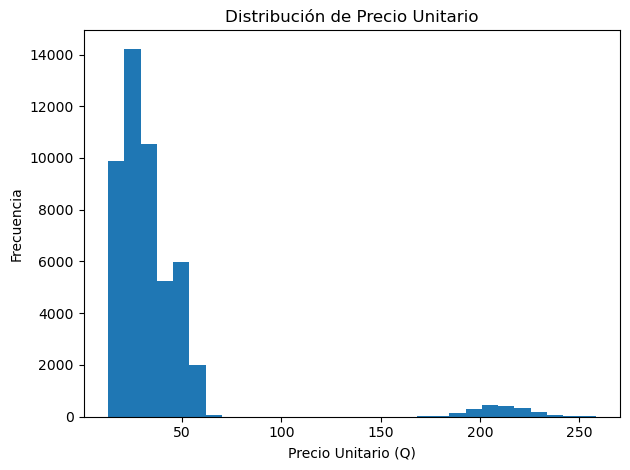

In [ ]:
plt.figure()
plt.hist(df['precio_unitario'], bins=30)
plt.title('Distribución de Precio Unitario')
plt.xlabel('Precio Unitario (Q)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,fecha,sku,producto,categoria,cliente,canal,zona,precio_unitario,cantidad,costo_unitario,margen_unitario,total_venta,total_costo,total_margen,year,month,dia,dia_semana,year_month
0,2023-06-20,SKU-A002,Hash brown 1kg,Papas & Appetizers,Taquería Don Memo,Mayorista,Izabal,23.48,4,17.40,6.08,93.92,69.60,24.32,2023,6,20,Tuesday,2023-06
1,2023-09-09,SKU-PR002,Salchicha tipo viena 1kg,Procesados,Comedor La Terminal,HORECA,Petén,28.50,6,17.89,10.61,171.00,107.34,63.66,2023,9,9,Saturday,2023-09
2,2024-11-11,SKU-D003,Contenedor plástico con tapa,Descartables / Empaques,Tienda Doña Juanita,HORECA,El Progreso,30.01,10,21.75,8.26,300.10,217.50,82.60,2024,11,11,Monday,2024-11
3,2023-02-07,SKU-PA002,Toalla de cocina 2 rollos,Papel,Supermercado El Sol,Mayorista,Retalhuleu,22.79,10,15.58,7.21,227.90,155.80,72.10,2023,2,7,Tuesday,2023-02
4,2023-08-16,SKU-A003,Aros de cebolla 1kg,Papas & Appetizers,Distribuidora El Centro,Retail,Jalapa,24.77,9,16.78,7.99,222.93,151.02,71.91,2023,8,16,Wednesday,2023-08


In [ ]:
# ================================================================
# MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
# ---------------------------------------------------------------
# Objetivo:
#   Evaluar la relación entre:
#     - precio_unitario
#     - cantidad
#     - costo_unitario
#     - total_venta
#     - total_margen
#
# Para qué sirve:
#   - Identificar variables que impactan más la venta.
#   - Detectar patrones útiles para modelos predictivos.
#   - Preparar el camino para Machine Learning.
# ================================================================

variables_numericas = ['precio_unitario', 'cantidad', 'costo_unitario', 'margen_unitario', 'total_venta', 'total_costo', 'total_margen']
corr = df[variables_numericas]
corr

,precio_unitario,cantidad,costo_unitario,margen_unitario,total_venta,total_costo,total_margen
0,23.48,4,17.40,6.08,93.92,69.60,24.32
1,28.50,6,17.89,10.61,171.00,107.34,63.66
2,30.01,10,21.75,8.26,300.10,217.50,82.60
3,22.79,10,15.58,7.21,227.90,155.80,72.10
4,24.77,9,16.78,7.99,222.93,151.02,71.91
...,...,...,...,...,...,...,...
49995,21.76,6,15.67,6.09,130.56,94.02,36.54
49996,48.70,10,29.26,19.44,487.00,292.60,194.40
49997,40.96,8,26.93,14.03,327.68,215.44,112.24
49998,40.92,10,28.95,11.97,409.20,289.50,119.70


In [ ]:
corr = df[variables_numericas].corr()
corr

,precio_unitario,cantidad,costo_unitario,margen_unitario,total_venta,total_costo,total_margen
precio_unitario,1.000000,-0.004177,0.989732,0.933990,0.909119,0.900669,0.853142
cantidad,-0.004177,1.000000,-0.003935,-0.004398,0.296800,0.293922,0.278824
costo_unitario,0.989732,-0.003935,1.000000,0.873329,0.899822,0.910152,0.797518
margen_unitario,0.933990,-0.004398,0.873329,1.000000,0.849014,0.794395,0.913976
total_venta,0.909119,0.296800,0.899822,0.849014,1.000000,0.990538,0.938848
total_costo,0.900669,0.293922,0.910152,0.794395,0.990538,1.000000,0.882708
total_margen,0.853142,0.278824,0.797518,0.913976,0.938848,0.882708,1.000000


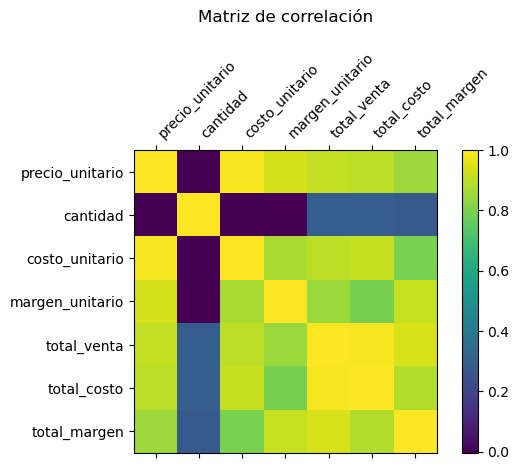

In [ ]:
fig, ax = plt.subplots()
cax = ax.matshow(corr, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticks(range(len(variables_numericas)))
ax.set_yticks(range(len(variables_numericas)))
ax.set_xticklabels(variables_numericas, rotation=45, ha='left')
ax.set_yticklabels(variables_numericas)

plt.title('Matriz de correlación', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Conclusiones Ejecutivas
📊 CONCLUSIONES EJECUTIVAS DEL ANÁLISIS DE VENTAS (EDA)

Período analizado: 2023–2024
Volumen de datos: 50,000 registros sintéticos realistas para distribución Foodservice en Guatemala.

🟦 1. Comportamiento temporal de ventas

El análisis mensual muestra que:

Las ventas se mantienen estables dentro de un rango aproximado de Q 650,000 a Q 780,000 mensuales.

Hay picos importantes en meses específicos como:

2023-10, 2023-11, 2024-12, donde se alcanzan máximos cercanos a Q 770,000 – Q 780,000.

Los meses más bajos rondan Q 640,000 – Q 670,000.

Interpretación ejecutiva

El negocio presenta estabilidad sin estacionalidad extrema, lo cual indica una operación madura y con demanda constante.

Los meses con picos podrían estar relacionados con temporadas de fin de año, compras institucionales o aumentos de consumo en HORECA.

No se observan señales de caída sostenida que indiquen contracción del mercado.

🟦 2. Ventas por categoría de producto

El ranking de categorías muestra:

Grasas y Aceites — claramente dominante con más de Q 5 millones

Proteínas — alrededor de Q 3.8 millones

Procesados — cerca de Q 2.7 millones

Papas & Appetizers — ~Q 2 millones

Bebidas

Descartables / Empaques

Papel — la categoría más baja

Interpretación ejecutiva

La mezcla de venta está fuertemente concentrada en categorías esenciales para cocina y fritura, lo cual confirma un portafolio orientado a Foodservice y HORECA.

Grasas y Aceites destacan como productos estratégicos; cualquier cambio en precio o disponibilidad afectaría fuertemente los ingresos totales.

Las categorías bajas (Papel, Empaques) sugieren oportunidad para cross-selling y aumentar el share en productos complementarios.

🟦 3. Ventas por canal

Las ventas se distribuyen así:

HORECA: ~Q 7.8 millones

Retail: ~Q 6.1 millones

Mayorista: ~Q 3.4 millones

Interpretación ejecutiva

HORECA es el canal más rentable, lo cual coincide con el comportamiento típico del Foodservice.

Retail tiene una participación fuerte, pero menor a HORECA.

El canal Mayorista muestra potencial de crecimiento si se desarrolla estrategia de volumen y portafolio específico.

Insight clave:
El negocio depende en gran medida de HORECA, por lo que esfuerzos comerciales, promociones y control de stock para este canal impactan directamente el desempeño mensual.

🟦 4. Ventas por zona geográfica

Las ventas por zonas son bastante uniformes, con rangos muy cercanos entre sí (entre Q 1.2M y Q 1.26M aprox.).

Las zonas más fuertes:

Huehuetenango

Izabal

Jutiapa

Alta Verapaz

Las más bajas, aunque muy parecidas:

Baja Verapaz

Quetzaltenango

Interpretación ejecutiva

La distribución territorial está balanceada, lo cual sugiere una red logística bien distribuida.

No se observan regiones significativamente débiles, lo que indica buen alcance.

Sin embargo, las zonas con menor volumen podrían ser candidatas para:

nuevas rutas,

campañas comerciales,

alianzas estratégicas.

🟦 5. Top productos

El top muestra:

Aceite vegetal 20L — el producto estrella por amplio margen

Filete de pescado

Pechuga de pollo

Jamón de pavo

Carne de res molida

Manteca vegetal

Lomo de cerdo

Papas a la francesa

Chorizo parrillero

Hamburguesa congelada

Interpretación ejecutiva

El aceite vegetal domina por su alta rotación y relevancia en HORECA, lo que refuerza la importancia del canal.

Los demás productos top están alineados con consumo típico de restaurantes: carnes, procesados y appetizers.

Esto confirma que el portafolio está correctamente orientado a operaciones de cocina.


🟦 6. Top clientes

Clientes con mayor venta:

Hotel Camino Real

Restaurante El Fogón

Cafetería Aroma

Taquería Don Memo

Tienda La Esperanza

Mini Market El Trébol

Bodega San Juan

Supermercado El Sol

Distribuidora El Centro

Restaurante Las Brasas

Interpretación ejecutiva

La cartera está compuesta por un mix equilibrado de HORECA, Retail y Mayorista.

El hecho de que no haya un solo cliente concentrando >20% de las ventas reduce el riesgo.

La presencia de hoteles y restaurantes en el top confirma el peso estratégico del canal HORECA.


🟦 7. Conclusiones estratégicas generales
✔ El negocio está estable y bien distribuido, sin estacionalidad fuerte.

Esto facilita la planificación y reduce riesgo financiero.

✔ La mayor concentración está en categorías esenciales (Grasas y Aceites, Proteínas).

Cualquier aumento de costo o escasez en estas líneas impacta directamente el margen.

✔ HORECA es el motor principal del negocio.

Invertir en este canal genera retorno rápido: promociones, servicio especializado, rutas dedicadas.

✔ Oportunidad de crecimiento en categorías complementarias.

(Papel, Empaques, Bebidas) → ideales para estrategias de cross-selling.

✔ La región geográfica está equilibrada, pero zonas como Baja Verapaz y Quetzaltenango pueden crecer.
✔ El portafolio top tiene lógica operacional y coincide con necesidades reales de Foodservice.


🟦 8. Recomendaciones ejecutivas

Optimizar inventario de Aceite vegetal 20L y otros básicos de alta rotación.

Explorar promociones o combos para categorías bajas como Empaques o Papel.

Fortalecer estrategia comercial para HORECA, especialmente restaurantes medianos.

Evaluar expansión geográfica focalizada en zonas de menor participación.

Construir modelo ABC para priorizar clientes y productos clave.

Desarrollar forecasting mensual con base en estabilidad del comportamiento.

In [ ]:
plt.bar(df['cantidad'])
plt.show()

NameError: name 'plt' is not defined